In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pd and np are for  pandas and numpy librabry.
The last 3 lines(confusion_matrix,accuracy_score and f1_score) are for checking the accuracy of the model. 
train_test_split is to split and train the data.
KNeighborsClassifier is for K nearest neibhour. 
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [2]:
data = pd.read_csv("E:\DS\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are some factors where the values cannot be zero. For example Glucose value cannot be 0 for a human. Similary BloodPressure,SkinThickness,Insulin and BMI cannot be zero for a human.

In [3]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    data[coloumn] = data[coloumn].replace(0,np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN,mean)
    print(data[coloumn])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


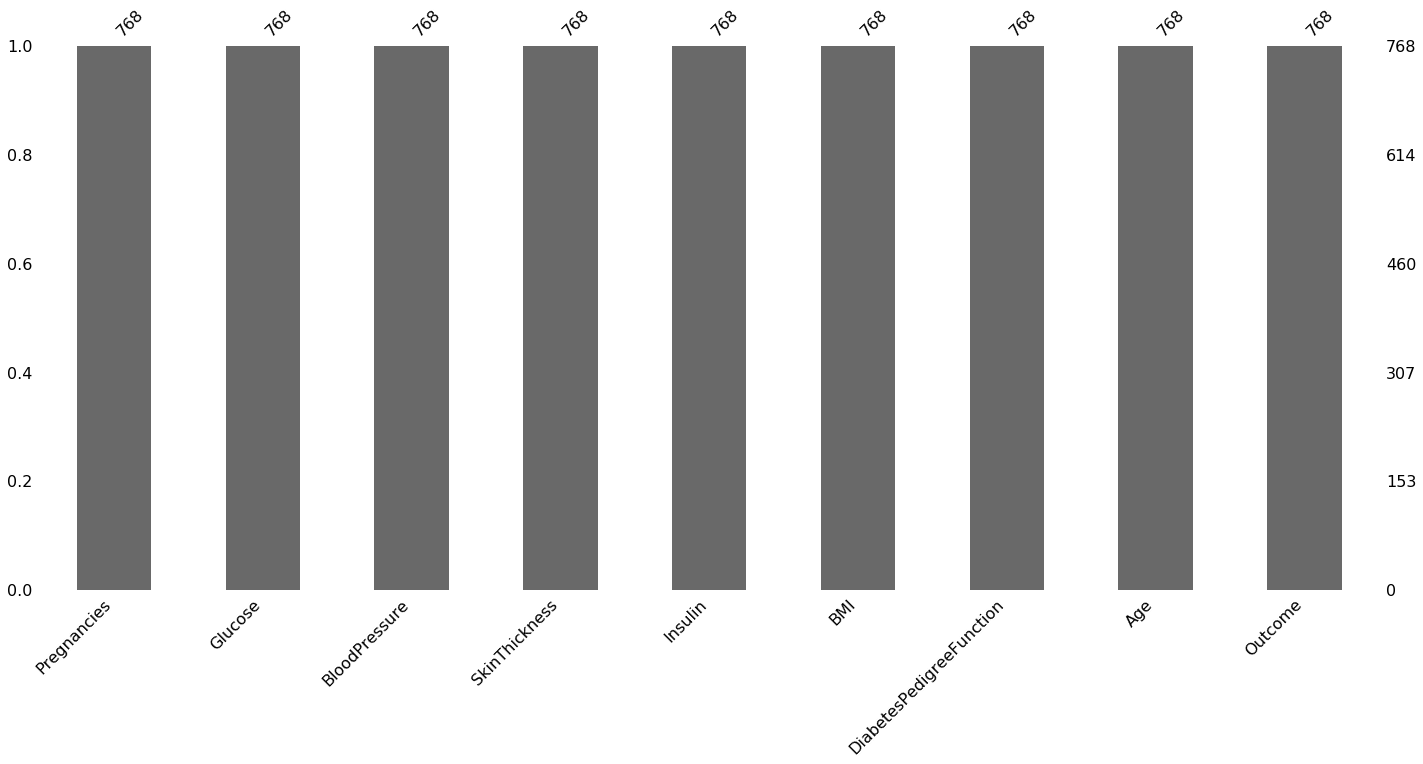

In [4]:
!pip install missingno
import missingno as msno
p=msno.bar(data)

Lets plot details of the diabatese data

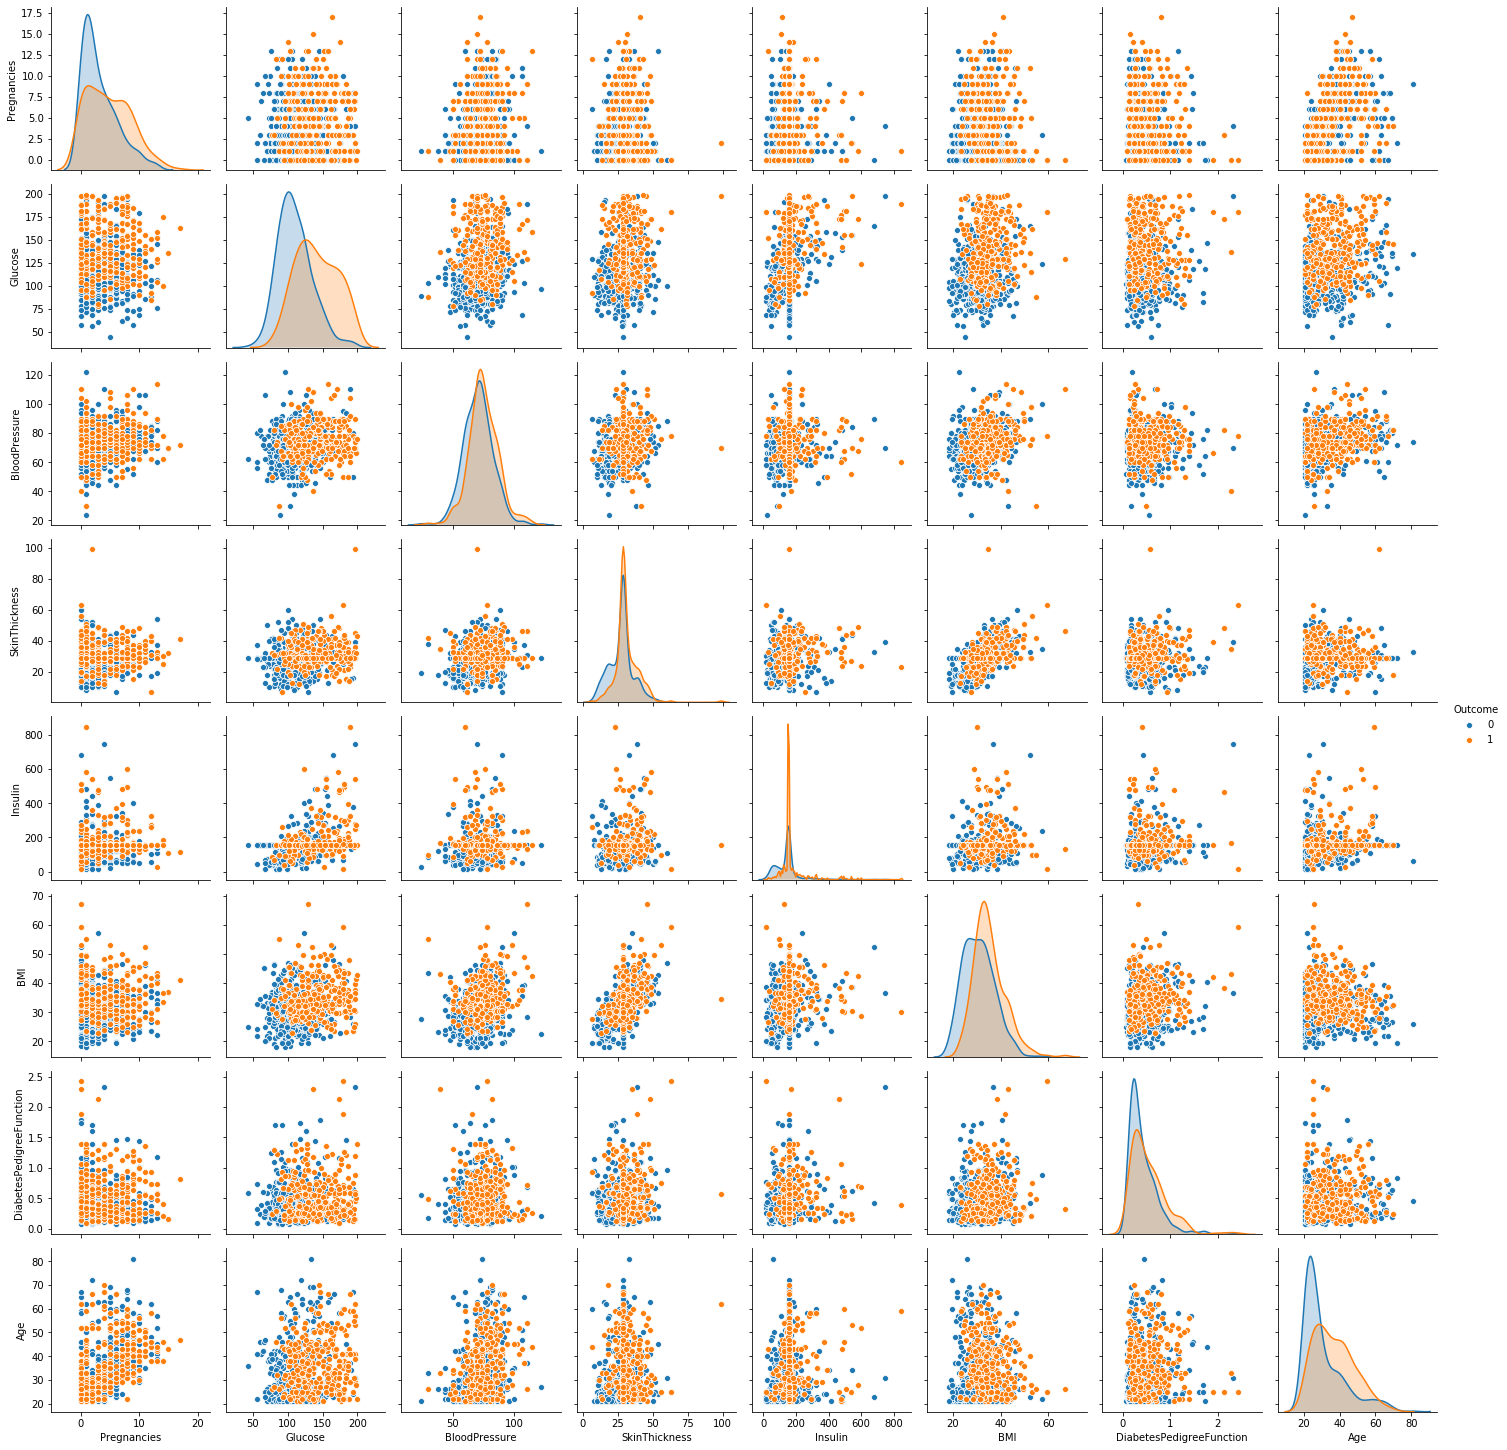

In [5]:
import seaborn as sns
p=sns.pairplot(data, hue = 'Outcome')

We have defined non_zero with the coloumn where the values cannot be zero. And in every coloumn we will first check if we have 0 value. Then we replace it will NaN. Later we are creating a mean of the coloumn and replacing the earlier with mean.

Since we have the data ready. It's time to train and test the data

In [6]:
X =data.iloc[:,0:8]
y =data.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

For data X we are taking all the rows of coloumn ranging from 0 to 7. Similary for y we are taking all the rows for the 8th coloumn.

We have train_test_split which we had imported during the start of the program and we have defined test size as 0.2 which implies out of all the data 20% will be kept aside to test the data at a later stage.

In [7]:
#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an  dataset will contain insulin column with values on scale 20-70 and Glucose column with values on scale 80-200.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model

In [8]:
import math
math.sqrt(len(y_test))

12.409673645990857

We have taken this value to get the value of K. We need an odd value of K so we will make it 12-1 or 12+1.

In [9]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')

In [10]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

Lets try to predict our data usinf classifier predict

In [11]:
y_pred =  classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

We have araay of data but we need to evalute our model to check the accuracy.
Lets start it with confusion matrix

In [12]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[86, 14],
       [24, 30]], dtype=int64)

We have the confusion matrix where the diagnol with 86 and 30 shows the correct value and 14,24 shows the prediction that we missed.

We will check the f1 score 

In [13]:
print(f1_score(y_test,y_pred))

0.6122448979591836


In [14]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


We have f1 score as 0.61 and accuracy score of .75

Lets plot the graph for the actual  data and our predicted vaue

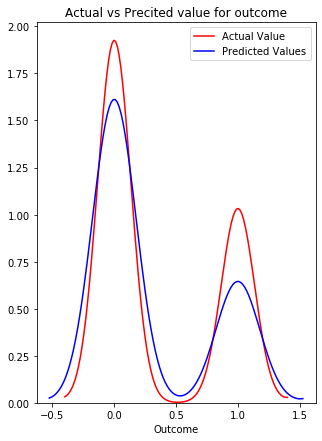

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()